# Apprentissage supervisé - Classification

## 1    Préparation des données
### 1.1    Téléchargement de données

In [1]:
from sklearn.datasets import fetch_openml

In [3]:
bdd = fetch_openml(name = "mnist_784", version = 1)

In [317]:
bdd

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

### 1.2    Information sur les données

#### 1.2.1.  Le retour de la fonction "fetch_openml" est un dictionnaire (mnist). Affichez ces clés.

In [5]:
bdd.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

#### 1.2.2.  En utilisant les clés du dictionnaire "mnist", affichez :

 •  La taille des données (le nombre des features et la taille de chaque feature).  Par convention, les données sont à stocker dans une variable "X".
 

In [6]:
bdd['data'].shape

(70000, 784)

In [11]:
X = bdd['data']
# Taille d'une feature :
X[0].size

784

In [12]:
from math import sqrt
print(sqrt(X[0].shape[0]))

28.0


 •  La taille des labels=classes (le nombre des labels). Par convention, les classes sont souvent à stocker dans une variable "y"
 

In [14]:
bdd['target'].size

70000

In [15]:
Y = bdd['target']
Y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

 •  Les différentes classes de la base de données 

In [16]:
import numpy as np

In [17]:
np.unique(Y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

 •  Une description détaillée de la base de données.

In [18]:
bdd

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

### 1.2.3. 

A travers cette question, vous avez dû conclure que la base de données MNIST contient 70000 images en niveau de gris, et chaque image est caractérisée par un features de taille 784=28*28.

•  Affichez l’image de la première instance de la base de données.

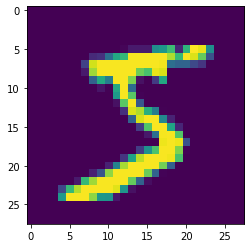

In [211]:
test = X[0].reshape(28,28)
from matplotlib import pyplot as pp 
pp.imshow(test)

•  Affichez la classe de la première instance

In [212]:
Y[0]

5

### 1.2.4.  Affichez le type des labels (du premier label par exemple)

In [26]:
type(Y[0])

str

### 1.2.5. 
A  travers  la  question  précédente,  vous  avez  dû  remarquer  que  le  type  des  labels  estune chaîne de caractères.   Il est préférable,  dans les projets d’apprentissage automatique,d’utiliser  des  chiffres.   Par  conséquent,  appliquez  le  casting  sur  les  labels  pour  les  trans-former à des entiers.

In [29]:
Y = Y.astype(int)
type(Y[0])

numpy.int32

In [30]:
Y

array([5, 0, 4, ..., 4, 5, 6])

### 1.3.    Répartition des données

Contrairement  aux  précédents  projets,  les  données  dans  MNIST  sont  déjà  partitionnées  en base  d’apprentissage  et  en  base  de  test.    Les  60  000  premières  images  composeront  la  base d’apprentissage et le reste des images constituera la base de test;
Écrivez un code qui met en exergue cette répartition tout en stockant les données de test/d’apprentissage et les classes de test/d’apprentissage dans 4 variables.

In [32]:
X_train = X[0:60000]
X_train.shape

(60000, 784)

In [33]:
X_test = X[60000:]
X_test.shape

(10000, 784)

In [34]:
Y_train = Y[0:60000]
Y_train = Y_train
Y_train.shape

(60000,)

In [36]:
Y_test = Y[60000:]
Y_test = Y_test
Y_test.shape

(10000,)

## 2    Apprentissage d’un classifieur binaire

Comme indiqué dans les objectifs,  ce projet vise à classifier les chiffres.   Une des solutions est d’utiliser un classifieur binaire qui est apte d’identifier que l’image représente bien le chiffre que nous cherchons ou non. Par exemple, nous nous focaliserons sur la reconnaissance du chiffre 5.

### 2.1    Apprentissage des données

#### 2.1.1. 
En utilisant les labels d’apprentissage et de test, écrivez un code qui stocke dans deux variables distinctes (une première pour la base d’apprentissage et une autre pour la base de test) True si le classe de l’instance est 5 et False Sinon.  De ce fait, nous traitons une classification binaire.

In [37]:
Y_train_bin = (Y_train == 5)
Y_train_bin

array([ True, False, False, ...,  True, False, False])

In [96]:
Y_test_bin = (Y_test == 5)
Y_test_bin

array([False, False, False, ..., False,  True, False])

#### 2.1.2. 
Pour l’apprentissage des données, nous allons utiliser le classifieur Stochastic Gradient Descent (SGD). Utiliser ce modèle pour la prédiction sur un chiffre (exemple 5).

In [39]:
Y_train.shape

(60000,)

In [40]:
from sklearn.linear_model import SGDClassifier

SGDClassifier()

In [118]:
clf = SGDClassifier()
clf.fit(X_train, Y_train_bin)

SGDClassifier()

In [48]:
Y_predit = clf.predict(X_train[[0]])
Y_predit

array([ True])

### 2.2    Évaluation du modèle d’apprentissage sur les données d’apprentissage

La mesure de performance d’une méthode de classification est souvent plus délicate qu’une méthode de régression. Cela est dû au nombre de mesures de performance existantes dans la littérature.

#### 2.2.1    Taux de classification.
##### 2.2.1.1
Écrivez un code qui répartit la base d’apprentissage en base d’apprentissage et en base de validation en utilisant la méthode 3-fold cross-validation.  Optez pour la valeur "accuracy"pour l’argument "scoring" pour afficher :

•  le taux de classification (accuracy) de chaque fold



In [50]:
from sklearn.model_selection import cross_val_score

In [56]:
cvs = cross_val_score(clf, X_train, Y_train_bin, cv=3, scoring='accuracy')

In [55]:
cvs

array([0.95335, 0.84215, 0.96   ])

•  la moyenne des taux de classification

In [57]:
print("L'accuracy moyenne est de", cvs.mean())

L'accuracy moyenne est de 0.95765


##### 2.2.1.2.  Dans cette question, vous allez créer un classifieur simple qui classifie toutes les images de MNIST comme "non-5".  Créez une classe Never5Classifier qui hérite de la classe Base Estimator. la classe BaseEstimator existe dans le sous-module "base" du module "sklearn"

In [58]:
from sklearn.base import BaseEstimator

class Never5Classifier (BaseEstimator):
    pass

2.1.2.3.  Dans la classe Never5Classifier, créez :

•  Une méthode fit qui prend en argument les données et les labels. Cette méthode ne va rien retourner et par conséquent va contenir que le mot-clé "pass".  Vous allez implémenter cette méthode car l’héritage de la classe BaseEstimator l’exige.

•  Une méthode predict qui prend en argument les données et retourne une structure dedonnées ayant la taille des données et qui contient que la valeur False (= non-5). Utilisezla fonction "zeros" du module "numpy" avec un "dtype=bool"

In [78]:
class Never5Classifier (BaseEstimator):
    
    def fit (self, donnees, labels):
        pass
    
    def predict (self, donnees):
        resultat = np.zeros((len(donnees),1), dtype=bool)
        return (resultat)

#### 2.2.1.4.  Créez un objet de la classe Never5Classifier

In [117]:
objet = Never5Classifier()

#### 2.2.1.5
Testez le classifieur en utilisant une validation croisée de type 3-fold cross-validation. Optezpour la valeur "accuracy" pour l’argument "scoring" pour afficher :  le taux de classification(accuracy) de chaque fold; La moyenne des taux de classification.

In [119]:
cvs = cross_val_score(clf, X_train, Y_train_bin, cv=3, scoring='accuracy')
cvs

array([0.96355, 0.9577 , 0.96335])

In [120]:
cvs.mean()

0.9615333333333335

#### 2.2.2    Matrice de confusion:

##### 2.2.2.1

In [150]:
from sklearn.model_selection import cross_val_predict
Y_pred = cross_val_predict(clf, X_train, Y_train_bin, cv = 3)

##### 2.2.2.2

In [102]:
from sklearn.metrics import confusion_matrix

In [122]:
print("Confusion matrix\n")
print(confusion_matrix(Y_train_bin, Y_pred), "\n")

Confusion matrix

[[54010   569]
 [ 2002  3419]] 



In [126]:
TN, FP, FN, TP = confusion_matrix(Y_train_bin, Y_pred).ravel()

print("True Positives(TP) =", TP, "\n")
print("False Negatives(FP) =", FP, "\n")
print("False Positives(FP) =", FP, "\n")
print("True Negatives(TN) =", TN, "\n")

True Positives(TP) = 3419 

False Negatives(FP) = 569 

False Positives(FP) = 569 

True Negatives(TN) = 54010 



#### 2.2.3.  Précision et rappel:
En utilisant le modèle déjà construit du classifieur SGD, prédisez les classes des donnéesd’apprentissage.    Pour  ce  faire,  utilisez  la  fonction  "cross_val_predict"  du  sous-module"model_selection" du module "sklearn".  Optez pour une validation croisée de type 3-foldcross validation.

##### 2.2.3.1. Calculez la précision, le rappel et le score F1 du modèle d’apprentissage

In [143]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
precision_recall_fscore_support(Y_train_bin, Y_pred, average='micro')

#(precision, rappel, score F1 et "support")

In [144]:
from sklearn.metrics import precision_score
precision_score(Y_train_bin, Y_pred)

0.857321965897693

In [145]:
from sklearn.metrics import recall_score
precision_score(Y_train_bin, Y_pred)

0.857321965897693

In [151]:
from sklearn.metrics import f1_score
f1_score(Y_train_bin, Y_pred)

0.7883211678832116

##### 2.2.3.2. 
Pour classifier les instances, le classifieur SGD calcule un score en se basant sur sa fonction de décision. Si le score est supérieur à un seuil, il affecte la classe positive à l’instance sinon il affecte la classe négative. Affichez les scores des différentes instances de la base d’apprentissage via la fonction "cross_val_predict". Optez pour une valeur de "decision_function" pour l’argument "method" et une validation croisée de type 3-fold cross-
validation.

In [169]:
Y_score = cross_val_predict(clf, X_train, Y_train_bin, cv = 3, method = "decision_function")

In [170]:
Y_score

array([  9508.25142963, -19348.23978459, -29430.14804276, ...,
         4070.38771902,  -9368.91344896, -10061.09991275])

##### 2.2.3.3. Calculez les précisions et les rappels de chaque instance en utilisant la fonction "precision_recall_curve"

In [155]:
from sklearn.metrics import precision_recall_curve

In [171]:
precision_recall_curve(Y_train_bin, Y_score)

(array([0.09087861, 0.09086337, 0.09086489, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]),
 array([-60498.56142505, -60488.55020729, -60455.70931115, ...,
         32519.81752356,  33147.03121163,  33154.03329575]))

In [172]:
precision_recall_curve(Y_train_bin, Y_score)

(array([0.09087861, 0.09086337, 0.09086489, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]),
 array([-60498.56142505, -60488.55020729, -60455.70931115, ...,
         32519.81752356,  33147.03121163,  33154.03329575]))

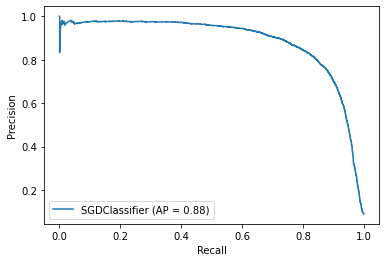

In [167]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(clf, X_train, Y_train_bin)

##### 2.2.3.4. Tracez la courbe des précisions/rappels. L’axe des abscisses doit contenir les rappels et l’axe des ordonnées doit contenir les précisions. Interprétez les résultats.

#### 2.2.4 Courbe ROC

##### 2.2.4.1. Calculez le taux de faux positifs (tfp), le taux de vrais positifs (tvp) et les seuils utilisés pour classifier les données d’apprentissage. Pour ce faire, utilisez la fonction "roc_curve" du sous-module "metrics" du module "sklearn"

In [173]:
from sklearn.metrics import roc_curve

In [181]:
courbe_roc = roc_curve(Y_train_bin, Y_score)

#La première valeur du tuple de courbe_roc est le tpr, la deuxième est le fpr, la troisième correspond aux seuils.
courbe_roc

(array([0.       , 0.       , 0.       , ..., 0.9936056, 0.9936056,
        1.       ]),
 array([0.00000000e+00, 1.84467810e-04, 1.91846523e-02, ...,
        9.99815532e-01, 1.00000000e+00, 1.00000000e+00]),
 array([  33155.03329575,   33154.03329575,   19910.44520993, ...,
         -60488.55020729,  -60498.56142505, -141349.6527327 ]))

##### 2.2.4.2. Tracez la courbe des ROC. L’axe des abscisses doit contenir les taux de faux positifs et l’axe des ordonnées doit contenir les taux de vrais positifs. Ajoutez des titres à ces deux axes et activer le mode "grid" avec la fonction grid de matplotlib

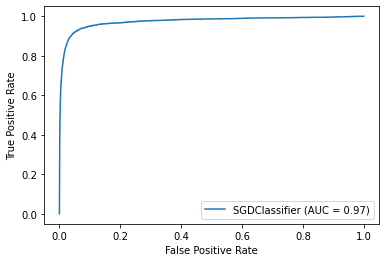

In [182]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_train, Y_train_bin)

##### 2.2.4.3. Calculez l’AUC (Area Under the Curve) du modèle d’apprentissage. Pour ce faire, utilisez la fonction "roc_auc_score" du sous-module "metrics" du module "sklearn".

In [194]:
from sklearn.metrics import roc_auc_score

In [195]:
roc_auc_score(Y_train_bin, Y_score)

0.9637009367259797

In [196]:
#Autre méthode : 
auc(courbe_roc[0], courbe_roc[1])

0.9637009367259797

In [ ]:
3 Apprentissage d’un classifieur multi-classes
Dans cette partie, nous allons apprendre un classifieur à classifier les 10 classes (les chiffres de 0 à
9) de la base de données MNIST.

## 3    Apprentissage d’un classifieur binaire


Dans cette partie, nous allons apprendre un classifieur à classifier les 10 classes (les chiffres de 0 à 9) de la base de données MNIST.

### 3.1. Apprentissage des données

#### 3.1.1 En se basant sur le classifieur SGD, faites l’apprentissage du modèle en se basant sur toutes les instances (images) d’apprentissage. Ainsi le modèle va apprendre à partir de toutes les classes de la BD et non pas juste à partir de deux classes comme c’était le cas dans la partie II de TP.

In [213]:
classifieur = SGDClassifier()
classifieur.fit(X_train, Y_train)

SGDClassifier()

#### 3.1.2. Via le modèle d’apprentissage bâti, prédisez la classe de la première instance de la base de données (celle de la question 3). La prédiction va être, cette fois-ci, un chiffre de 0 à 9.

In [223]:
Y_predit = classifieur.predict(X_train)
Y_predit[0]

5

Pour le coup la première valeur est bonne donc on est satisfaits mais il y a une part d'aléatoire donc ce n'est pas garanti que sur un autre apprentissage, le modèle ne donne pas plutôt 3.

In [229]:
# Le score préférentiellement utilisé pour un SGD est l'accuracy :
classifieur.score(X_train, Y_train)

0.8910666666666667

In [230]:
# On peut aussi regarder le R2
from sklearn.metrics import r2_score
r2_score(Y_train, Y_predit)

0.7589149189098939

#### 3.1.3. En utilisant l’objet qui instancie la classe SGDClassifier :
• Affichez, via la méthode "decision_function", les 10 scores de décision utilisés par la
méthode SGD pour classifier la première instance de la base de données.

In [242]:
Y_score = cross_val_predict(classifieur, X_train, Y_train, cv = 3, method = "decision_function")

In [246]:
Y_score.shape

(60000, 10)

In [267]:
Y_score[0]

array([-29442.16703614, -46918.54776755, -26312.52118101,   4203.31727519,
       -44181.85306657,   1715.20846064, -40658.44057252, -32519.98637304,
       -20237.5526476 , -19550.91102646])

• Affichez, via l’attribut "classes_", les différentes classes utilisées par le classifieur.

In [248]:
classifieur.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [269]:
classifieur.predict(X_train)

array([5, 0, 4, ..., 5, 6, 0])

In [270]:
y_coucou = classifieur.predict(X_train)
y_coucou[0]

5

Qu’est ce que vous remarquez ?

En regardant le Y_score issu de la cross validation avec la méthode decision_function, on remarque que pour la valeur d'indice 5, le score de décision est celui qui est le plus proche de 0. C'est donc le label qui correspond à ce score qui aura été choisi par notre classifieur.

On remarque qu'un autre score est relativement proche de zéro également : celui pour le label 3.

C'est normal car le classifieur a tendance à hésiter entre 3 et 5 pour la détermination du label de la première instance de la base de données.

### 3.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage

#### 3.2.1 Taux de classification

##### 3.2.1.1. Écrivez un code qui répartit la base d’apprentissage en base d’apprentissage et en base de validation en utilisant la méthode 3-fold cross-validation. Optez pour la valeur "accuracy" pour l’argument "scoring" pour afficher : le taux de classification (accuracy) de chaque fold; la moyenne des taux de classification

In [231]:
cvs = cross_val_score(classifieur, X_train, Y_train, cv=3, scoring='accuracy')
cvs

array([0.8675, 0.8658, 0.8534])

In [280]:
#cvs.mean()

#J'ai réparé cette celulle car je n'avais pas envie de refaire ma crossval)
np.array([0.8675, 0.8658, 0.8534]).mean()

0.8622333333333333

##### 3.2.1.2. Une des techniques d’amélioration des taux de classification est le "Scaling". Vérifiez ceci en appliquant une standardisation sur les données d’apprentissage avec la classe StandardScaler.

In [233]:
from sklearn.preprocessing import StandardScaler

In [271]:
scaler = StandardScaler()

In [272]:
scaler.fit(X_train, Y_train)

X_train
X_train_scaled = X_train.copy()
scaler.transform(X_train_scaled)
X_train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [273]:
classifieur.fit(X_train_scaled, Y_train)

SGDClassifier()

##### 3.2.1.3. Évaluez le modèle sur les nouvelles données d’apprentissage avec une validation croisée de type 3-fold cross-validation. Les résultats sont-ils meilleurs que ceux avant le Scaling?

In [274]:
cvs = cross_val_score(classifieur, X_train_scaled, Y_train, cv=3, scoring='accuracy')
cvs

array([0.8758 , 0.8752 , 0.87795])

In [276]:
cvs.mean()

0.8763166666666665

On remarque un meilleur résultat avec un standard scaling préalable mais la différence est minime et peut tenir de l'aléatoire.

#### 3.2.2 Matrice de Confusion

###### 3.2.2.1. En utilisant le modèle déjà construit du classifieur SGD, prédisez les classes des données d’apprentissage.

In [282]:
Y_pred = classifieur.predict(X_train)
Y_pred

array([5, 0, 4, ..., 5, 6, 8])

###### 3.2.2.2. Affichez la matrice de confusion du modèle d’apprentissage. Pour ce faire, utilisez la fonction "confusion_matrix" du sous-module "metrics" du module "sklearn". La taille de la matrice de confusion, cette fois-ci, est 10x10 car on traite un problème de classification de 10 classes. Interprétez les résultats.

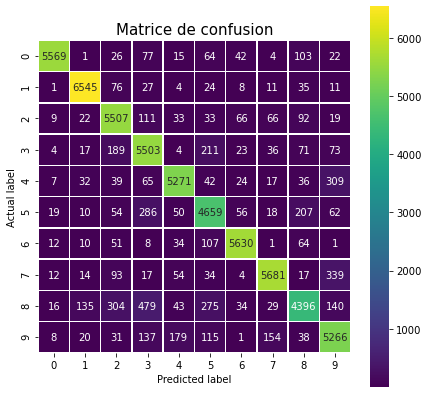

In [446]:
matrice_conf = confusion_matrix(Y_train, Y_pred)

pp.figure(figsize=(7,7))
sns.heatmap(matrice_conf, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'viridis');
pp.ylabel('Actual label');
pp.xlabel('Predicted label');
pp.title("Matrice de confusion", size = 15)
pp.show()

On note une belle diagonale bien remplie de valeurs plus élevées allant de la première à la dernière case de la matrice, cela correspond aux valeurs correctement prédites par notre modèle.

En effet, dans une matrice de confusion (qu'elle soit binaire ou mutliclasse comme ici), les colonnes représentent les vraies valeurs et les lignes les valeurs prédites.

Tout ce qui se trouve à l'extérieur de la diagonale correspond donc à des objets mal classées par notre modèle.

**Cas notables :** on peut voir que dans 339 cas de 7 réels, notre modèle se sera trompé et aura décelé un 9 à tort. C'est la plus haute valeur de faux négatif pour notre tableau. Le 7 semble donc être le chiffre qui donne le plus de fil à retordre à notre modèle.

Par opposition, dans d'autres cas, il est rarissime que notre modèle se trompe. Par exemple il n'a confondu qu'une seule fois un 9 réel avec un 6.

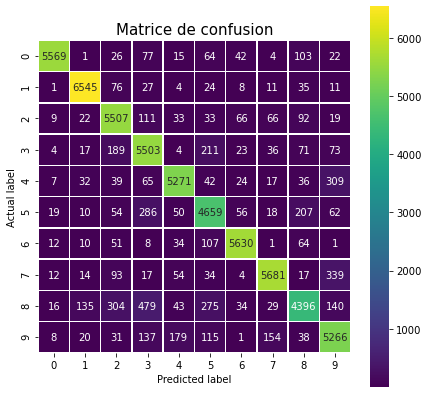

In [445]:
confusion_matrix(Y_train, Y_train)

Le cas plus haut est pour illustration, il montre une matrice "parfaite" sans erreur de valeur mal prédite.

## 4.   Version avec CNN (Convolutional Neural Networks)


In [494]:
# Si on fait des bêtises sur notre modèle, on peut supprimer l'instance ainsi :
# del model

In [495]:
import tensorflow as tf

In [496]:
tf.__version__

'2.4.0'

**Normalisation des données :**

In [497]:
X_train2 = tf.keras.utils.normalize(X_train, axis = 1)
X_train2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [498]:
X_test2 = tf.keras.utils.normalize(X_test, axis = 1)
X_test2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Instanciation du modèle :**

In [499]:
# On instancie notre objet modèle.
model = tf.keras.models.Sequential()

**Création des layers :**

Couche d'input :

In [500]:
# Couche d'input :

# tf.keras.layers.Flatten() est un équivalent de np.reshape pour aplatir une matrice
model.add(tf.keras.layers.Flatten())

Couches intermédiaires :

In [501]:
# Deux couches, 128 neurones chacune, une fonction d'activation relu (rectified linear unit) :

model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

Couche d'output :

In [502]:
# Il y a 10 neurones, nos 10 classes pour les nombres !

model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) #tf.nn.softmax : densité de probabilité

**Compilation du modèle :**

In [503]:
# Compilation du modèle avec l'optimiseur adam:
model.compile(optimizer = "adam", # choix de l'optimiseur,
                     loss = "sparse_categorical_crossentropy", # choix de la fonction coût
                     metrics = ["accuracy"]) # choix du ou des métriques qu'on va vouloir suivre

**Entraînement du modèle :**

In [504]:
model.fit(X_train2, Y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5925 - accuracy: 0.8349
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1500 - accuracy: 0.9559
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0997 - accuracy: 0.9704


In [385]:
val_loss, val_acc = model.evaluate(X_test2, Y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0815 - accuracy: 0.9747
0.08146729320287704
0.9746999740600586


On peut tester de créer un modèle avec un optimiseur SGD pour voir s'il donne de meilleurs résultats :

In [506]:
#del model_sgd
model_sgd = tf.keras.models.Sequential()
model_sgd.add(tf.keras.layers.Flatten())
model_sgd.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model_sgd.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model_sgd.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) 
model_sgd.compile(optimizer = "SGD", # choix de l'optimiseur,
                  loss = "sparse_categorical_crossentropy", # choix de la fonction coût
                  metrics = ["accuracy"]) # choix du ou des métriques qu'on va vouloir suivre
model_sgd.fit(X_train2, Y_train, epochs = 3)

val_loss, val_acc = model_sgd.evaluate(X_test2, Y_test)
print(val_loss)
print(val_acc)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2389 - accuracy: 0.3167
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4702 - accuracy: 0.6698
Epoch 3/3
313/313 [==============================] - 1s 1ms/step - loss: 0.5269 - accuracy: 0.8587
0.5269081592559814
0.8586999773979187


Si on se limite à 3 epochs, il vaut mieux privilégier l'optimiseur "adam", il donne une meilleure accuracy que l'optimiseur "SGD".

**Création d'un array de prédiction avec notre modèle :**

In [510]:
predictions = model.predict([X_test2])

In [514]:
type(predictions)

numpy.ndarray

On peut s'amuser à regarder instance par instance de notre bdd pour voir si le modèle prédit bien.

In [511]:
np.argmax(predictions[58])

9

Affichons la valeur réelle de cette instance de la bdd :

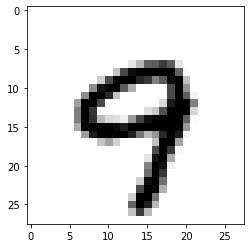

In [512]:
pp.imshow(X_test2[58].reshape(28,28), cmap = pp.cm.binary)

## 5.   Interface graphique